# Physik der sozio-ökonomischen Systeme mit dem Computer
# (Physics of Socio-Economic Systems with the Computer)

### Vorlesung gehalten an der J.W.Goethe-Universität in Frankfurt am Main 
#### (Wintersemester 2020/21)

### von Dr.phil.nat. Dr.rer.pol. Matthias Hanauske

### Frankfurt am Main 24.11.2022


### Zweiter Vorlesungsteil:  
#### Kleine Welt Netzwerke (small world networks)


## Einführung

Aufgrund ihrer unterschiedlichen Eigenschaften unterscheidet man die folgenden Netzwerk-Klassen: Zufällige Netzwerke (Random Networks: Die einzelnen Kanten bei zufälligen Netzwerke werden von den Knoten (Spielern) nach einem rein zufälligen Muster ausgewählt), Kleine Welt-Netzwerke (Small World Networks, Kleine Welt-Netzwerke zeichnen sich durch einen kleinen Wert der durchschnittlichen kürzesten Verbindung zwischen den Knoten des Netzwerkes und einem großen Wert des Clusterkoeffizienten aus), Exponentielle Netzwerke (Exponential Networks) und Skalenfreie Netzwerke (Scale-Free Networks). Bei einigen Modellnetzwerken können analytische Ergebnisse gewonnen werden. Im Folgenden betrachten wir die Klasse der kleinen Welt Netzwerke.

"Kleine Welt"-Netzwerke zeichnen sich durch einen kleinen Wert der durchschnittlichen kürzesten Verbindung zwischen den Knoten des Netzwerkes und einem großen Wert des Clusterkoeffizienten aus. Ein einfaches Modell, welches den Übergang von einem Netzwerk mit regulärer Struktur (Gitter-ähnlicher Struktur) über ein "kleines Welt"-Netzwerk hin zu einem zufälligen Netzwerk veranschaulicht, wurde von Watts und Strogatz im Jahre 1998 vorgestellt. Im einfachsten Fall startet man hierbei mit einem eindimensionalen Gitter-Netzwerk mit N Knoten, wobei jeder Knoten mit seinen K-nächsten Nachbarn (im folgenden Beispiel speziell K=2) verbunden ist. Nun löscht man mit der Wahrscheinlichkeit p jede der existierenden Verbindungen (Kanten) und stellt eine neue Kante im Netzwerk in zufälliger Weise her. Für p=0 bleibt die ursprüngliche Gitterstruktur erhalten und für p=1 erzeugt man ein vollständig verbundenes Netzwerk. Watts und Strogatz konnten in ihrem Modell zeigen, dass man schon für kleine p (0 < p << 1) ein "kleines Welt"-Netzwerk erzeugt, das durch einen kleinen Wert der durchschnittlichen kürzesten Verbindung zwischen den Knoten und einem großen Wert des Clusterkoeffizienten gekennzeichnet ist. Im Folgenden veranschaulichen wir das Prinzip eines Watts-Strogatz "kleine Welt"-Netzwerks.

Wir erstellen zunächst ein reguläres Ring-Netzwerk, wobei jeder Knoten mit seinem nächsten und übernächsten Nachbarn verbunden ist.

In [1]:
import networkx as nx
from random import randint

G=nx.Graph()
N = 70 
G.add_nodes_from(range(0,N,1))
i=0
while i <= N-3:
    G.add_edge(i,i+1)
    G.add_edge(i,i+2)
    i=i+1
G.add_edge(N-2,N-1)  
G.add_edge(N-2,0)
G.add_edge(N-1,0)
G.add_edge(N-1,1)

Die Verlinkungswahrscheinlichkeit p und der durchschnittliche Knotengrad $\bar{k}$ des erzeugten Netzwerks haben die folgenden Werte:

In [2]:
p=(2*G.number_of_edges()/(N*(N-1)))
print("Verlinkungswahrscheinlichkeit p:")
print(p)
sumki=0
for i in G.nodes():
    sumki=sumki+G.degree()[i]
avki=sumki/N
print("Durchschnittliche Knotengrad:")
print(avki)

Verlinkungswahrscheinlichkeit p:
0.057971014492753624
Durchschnittliche Knotengrad:
4.0


Die durchschnittliche kürzeste Verbindungsstrecke $l$ zwischen zwei Knoten, der Durchmesser des Netzwerks $d_{\rm max}$ und der globale Clusterkoeffizient $C$ betragen:

In [3]:
print("Durchschnittliche kürzeste Verbindungsstrecke zwischen zwei Knoten:")
print(nx.average_shortest_path_length(G))
print("Durchmesser des Netzwerks:")
print(nx.diameter(G))
print("Globaler Clusterkoeffizient:")
print(nx.average_clustering(G))

Durchschnittliche kürzeste Verbindungsstrecke zwischen zwei Knoten:
9.130434782608695
Durchmesser des Netzwerks:
18
Globaler Clusterkoeffizient:
0.5


Die Verteilungsfunktion der Knotengrade $N(k)$ ist sehr einfach, da jeder Knoten vier Kanten hat; dies entspricht nicht der analytischen Binomialverteilung eines zufälligen Netzwerks (schwarze Kurve).

In [4]:
degree_sequence = []
for i in G.nodes():
    degree_sequence.append(G.degree(i))
maxk=max(degree_sequence)

In [5]:
#Von https://de.wikibooks.org/wiki/Algorithmensammlung:_Statistik:_Binomialkoeffizient
def binomialkoeffizient(n, k):
    if k == 0: return 1
    if 2*k > n:
        ergebnis = binomialkoeffizient(n, n-k)
    else:
        ergebnis = n-k+1
        for i in range(2, k+1):  # i in [2; k]
            ergebnis *= (n-k+i)  # Selbstmultiplikation
            ergebnis /= i  # Achtung: Ergebnis ist eine Kommazahl!
    return int(ergebnis)

#Analytische Verteilungsfunktion eines zufaelligen Netzwerkes
def P(n,kmin,kmax,p):
    ergebnis=[]
    for k in range(kmin,kmax,1):
        ergebnis.append(binomialkoeffizient(n-1,k)*p**k*(1-p)**(n-1-k))
    return ergebnis  

In [6]:
import matplotlib.pyplot as plt 
import matplotlib
import numpy as np
params = {
    'figure.figsize'    : [10,6],
    'text.usetex'       : True,
    'axes.titlesize' : 14,
    'axes.labelsize' : 16,  
    'xtick.labelsize' : 14 ,
    'ytick.labelsize' : 14 
}
matplotlib.rcParams.update(params) 

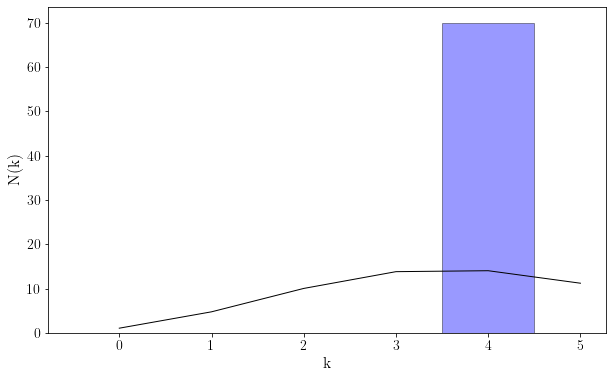

In [7]:
plt.xlabel(r"$\rm k$")
plt.ylabel(r'$\rm N(k)$')
plt.hist(degree_sequence,bins=range(0,int(maxk+2),1), align="left" ,histtype='bar', color="blue", alpha=0.4, edgecolor="black");
plt.plot(range(0,int(maxk+2),1),np.array(P(N,0,int(maxk+2),p))*N, linewidth=1, linestyle='-', c="black");

Wir stellen dieses Netzwerk dar:

In [8]:
import plotly.graph_objects as go

In [9]:
def plot_network():
    pos3d=nx.fruchterman_reingold_layout(G,dim=3)
    node_x=[pos3d[k][0] for k in range(N)]
    node_y=[pos3d[k][1] for k in range(N)]
    node_z=[pos3d[k][2] for k in range(N)]
    edge_x = []
    edge_y = []
    edge_z = []
    for edge in G.edges():
        edge_x+=[pos3d[edge[0]][0],pos3d[edge[1]][0], None]
        edge_y+=[pos3d[edge[0]][1],pos3d[edge[1]][1], None]
        edge_z+=[pos3d[edge[0]][2],pos3d[edge[1]][2], None]
    labels=[]
    group=[]
    for node in G.nodes():
        labels.append('Knoten '+str(node)+', Knotengrad = '+str(degree_sequence[node]))
        group.append(degree_sequence[node])

    edge_trace=go.Scatter3d(x=edge_x,
                   y=edge_y,
                   z=edge_z,
                   mode='lines',
                   line=dict(color='black', width=1.1),
                   hoverinfo='none'
                   )

    node_trace=go.Scatter3d(x=node_x,
                   y=node_y,
                   z=node_z,
                   mode='markers',
#               name='actors',
                   marker=dict(symbol='circle',
                                 size=6,
                                 color=group,
                                 colorscale='YlGnBu',
                                 line=dict(color='black', width=0.8)
                                 ),
                   text=labels,
                   opacity=0.9,
                       hoverinfo='text'
                   )
    axis=dict(showbackground=False,
              backgroundcolor="white",
              showline=False,
              zeroline=False,
              showgrid=True,
              gridcolor="rgb(244, 233, 245)",
              showticklabels=False,
              showaxeslabels=False,
              )

    layout = go.Layout(
             width=700,
             height=700,
             showlegend=False,
             scene=dict(
                 xaxis=dict(axis),
                 yaxis=dict(axis),
                 zaxis=dict(axis),
            ),
        margin=dict(b=20,l=10,r=10,t=10),
        hovermode='closest',
       )
    data=[node_trace,edge_trace]
    fig=go.Figure(data=data, layout=layout)
    fig.show()

In [10]:
plot_network()

Die obige Abbildung zeigt gut die reguläre Ringstruktur des Netzwerkes. Der Durchmesser des Netzwerks $d_{\rm max}$ (maximale kürzeste Kantenlänge zwischen zwei beliebigen Knoten des Netzwerks) und der Clusterkoeffizient ist groß. 

In [11]:
print("Durchschnittliche kürzeste Verbindungstrecke zwischen zwei Knoten:")
print(nx.average_shortest_path_length(G))
print("Durchmesser des Netzwerks")
print(nx.diameter(G))
print("Clusterkoeffizient des Netzwerks")
print(nx.average_clustering(G))

Durchschnittliche kürzeste Verbindungstrecke zwischen zwei Knoten:
9.130434782608695
Durchmesser des Netzwerks
18
Clusterkoeffizient des Netzwerks
0.5


Wir löschen nun z.B. drei Verbindungen und fügen dafür drei neue Kanten in zufälliger Weise dem Netzwerk hinzu.

In [12]:
anzNewEdge=3
for i in range(1,anzNewEdge):
    NewEdge=0
    while NewEdge==0:    
        KnA = randint(0, N-1)
        NeigList = list(G.neighbors(KnA))
        Neig = randint(0, len(NeigList)-1)
        KnB = NeigList[Neig]
        KnC = randint(0, N-1)
        if KnA != KnC and list(G.edges()).count((KnA,KnC))==0 and list(G.edges()).count((KnC,KnA))==0 and KnB != KnC:
            G.remove_edge(KnA, KnB)
            G.add_edge(KnA,KnC)
            NewEdge=1

In [13]:
plot_network()

In [14]:
print("Durchschnittliche kürzeste Verbindung zwischen zwei Knoten:")
print(nx.average_shortest_path_length(G))
print("Durchmesser des Netzwerks")
print(nx.diameter(G))
print("Clusterkoeffizient des Netzwerks")
print(nx.average_clustering(G))

Durchschnittliche kürzeste Verbindung zwischen zwei Knoten:
7.363975155279503
Durchmesser des Netzwerks
18
Clusterkoeffizient des Netzwerks
0.4895238095238095


Wir erkennen, dass der Durchmesser des Netzwerks sich deutlich veringert hat. Wir führen diesen Prozess abermals durch.

In [15]:
anzNewEdge=3
for i in range(1,anzNewEdge):
    NewEdge=0
    while NewEdge==0:    
        KnA = randint(0, N-1)
        NeigList = list(G.neighbors(KnA))
        Neig = randint(0, len(NeigList)-1)
        KnB = NeigList[Neig]
        KnC = randint(0, N-1)
        if KnA != KnC and list(G.edges()).count((KnA,KnC))==0 and list(G.edges()).count((KnC,KnA))==0 and KnB != KnC:
            G.remove_edge(KnA, KnB)
            G.add_edge(KnA,KnC)
            NewEdge=1

In [16]:
plot_network()

In [17]:
print("Durchschnittliche kürzeste Verbindungstrecke zwischen zwei Knoten:")
print(nx.average_shortest_path_length(G))
print("Durchmesser des Netzwerks")
print(nx.diameter(G))
print("Clusterkoeffizient des Netzwerks")
print(nx.average_clustering(G))

Durchschnittliche kürzeste Verbindungstrecke zwischen zwei Knoten:
6.051345755693582
Durchmesser des Netzwerks
12
Clusterkoeffizient des Netzwerks
0.4695238095238095


... und nochmal ... und nochmal

In [18]:
anzNewEdge=6
for i in range(1,anzNewEdge):
    NewEdge=0
    while NewEdge==0:    
        KnA = randint(0, N-1)
        NeigList = list(G.neighbors(KnA))
        Neig = randint(0, len(NeigList)-1)
        KnB = NeigList[Neig]
        KnC = randint(0, N-1)
        if KnA != KnC and list(G.edges()).count((KnA,KnC))==0 and list(G.edges()).count((KnC,KnA))==0 and KnB != KnC:
            G.remove_edge(KnA, KnB)
            G.add_edge(KnA,KnC)
            NewEdge=1

In [19]:
plot_network()

In [20]:
print("Durchschnittliche kürzeste Verbindung zwischen zwei Knoten:")
print(nx.average_shortest_path_length(G))
print("Durchmesser des Netzwerks")
print(nx.diameter(G))
print("Clusterkoeffizient des Netzwerks")
print(nx.average_clustering(G))

Durchschnittliche kürzeste Verbindung zwischen zwei Knoten:
5.3445134575569355
Durchmesser des Netzwerks
11
Clusterkoeffizient des Netzwerks
0.4333333333333333


Wir stellen diese Konstruktion eines Watts-Strogatz "kleine Welt" Netzwerks in einer Animation dar:

In [21]:
import matplotlib.animation as animation
from IPython.display import HTML
import matplotlib.gridspec as gridspec
params = {
    'figure.figsize'    : [13,6.5],
#    'text.usetex'       : True,
    'axes.titlesize' : 14,
    'axes.labelsize' : 16,  
    'xtick.labelsize' : 14 ,
    'ytick.labelsize' : 14 
}
matplotlib.rcParams.update(params) 

In [22]:
G=nx.Graph()
N = 70 
G.add_nodes_from(range(0,N,1))
i=0
while i <= N-3:
    G.add_edge(i,i+1)
    G.add_edge(i,i+2)
    i=i+1
G.add_edge(N-2,N-1)  
G.add_edge(N-2,0)
G.add_edge(N-1,0)
G.add_edge(N-1,1)

fig = plt.figure()
gs = gridspec.GridSpec(1, 3, width_ratios=[1,1,2], wspace=0.25)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])

npoints=20
properties=np.empty([npoints,2])

def init():   
    properties[0].flat[0] = nx.average_clustering(G)
    properties[0].flat[1] = nx.average_shortest_path_length(G)
    ax1.plot(range(0,npoints,1),properties[0:,0], c="black",label=r'$\rm C_t/C_0 $')
    ax1.plot(range(0,npoints,1),properties[0:,1], c="red",label=r'$\rm l_t/l_0$')
    for i in G.nodes():
        degree_sequence.append(G.degree(i))
    maxk=max(degree_sequence)
    ax2.hist(degree_sequence,bins=range(0,int(maxk+2),1), align="left" ,histtype='bar', color="blue", alpha=0.4, edgecolor="black");
    ax2.plot(range(0,int(maxk+2),1),np.array(P(N,0,int(maxk+2),p))*N, linewidth=1, linestyle='-', c="black");
    pos3d=nx.fruchterman_reingold_layout(G,dim=2)
    node_x=[pos3d[k][0] for k in range(N)]
    node_y=[pos3d[k][1] for k in range(N)]
    edge_x = []
    edge_y = []
    for edge in G.edges():
        edge_x.append([pos3d[edge[0]][0],pos3d[edge[1]][0]])
        edge_y.append([pos3d[edge[0]][1],pos3d[edge[1]][1]])    
    ax3.scatter(node_x, node_y, s=3, marker='o', c="blue")
    for i in range(len(G.edges())):
        ax3.plot(edge_x[i], edge_y[i], linewidth=0.2, c="black")
    ax1.set_xlim(1,npoints)
    ax1.set_ylim(0,1.05) 
    ax1.set_ylabel(r'$\rm C_t/C_0 \,\, l_t/l_0$')
    ax2.set_xlabel(r"$\rm k$")
    ax2.set_ylabel(r'$\rm N(k)$')
    ax3.axis('off')
    ax1.legend(shadow=False, frameon=False)
    return fig,

def animate(it):
    ax1.cla()
    ax2.cla()
    ax3.cla()
    properties[it+1].flat[0] = nx.average_clustering(G)/properties[0,0]
    properties[it+1].flat[1] = nx.average_shortest_path_length(G)/properties[0,1]
    ax1.plot(range(0,npoints,1),properties[0:,0], c="black",label=r'$\rm C_t/C_0 $')
    ax1.plot(range(0,npoints,1),properties[0:,1], c="red",label=r'$\rm l_t/l_0$')
    degree_sequence = []
    for i in G.nodes():
        degree_sequence.append(G.degree(i))
    maxk=max(degree_sequence)
    ax2.hist(degree_sequence,bins=range(0,int(maxk+2),1), align="left" ,histtype='bar', color="blue", alpha=0.4, edgecolor="black");
    ax2.plot(range(0,int(maxk+2),1),np.array(P(N,0,int(maxk+2),p))*N, linewidth=1, linestyle='-', c="black");
    pos3d=nx.fruchterman_reingold_layout(G,dim=2)
    node_x=[pos3d[k][0] for k in range(N)]
    node_y=[pos3d[k][1] for k in range(N)]
    edge_x = []
    edge_y = []
    for edge in G.edges():
        edge_x.append([pos3d[edge[0]][0],pos3d[edge[1]][0]])
        edge_y.append([pos3d[edge[0]][1],pos3d[edge[1]][1]])    
    ax3.scatter(node_x, node_y, s=3, marker='o', c="blue")
    for i in range(len(G.edges())):
        ax3.plot(edge_x[i], edge_y[i], linewidth=0.2, c="black")
    NewEdge=0
    while NewEdge==0:    
        KnA = randint(0, N-1)
        NeigList = list(G.neighbors(KnA))
        Neig = randint(0, len(NeigList)-1)
        KnB = NeigList[Neig]
        KnC = randint(0, N-1)
        if KnA != KnC and list(G.edges()).count((KnA,KnC))==0 and list(G.edges()).count((KnC,KnA))==0 and KnB != KnC:
            G.remove_edge(KnA, KnB)
            G.add_edge(KnA,KnC)
            NewEdge=1
    ax1.set_xlim(1,npoints)
    ax1.set_ylim(0,1.05) 
    ax1.set_ylabel(r'$\rm C_t/C_0 \, , \,\, l_t/l_0$')
    ax2.set_xlabel(r"$\rm k$")
    ax2.set_ylabel(r'$\rm N(k)$')
    ax3.axis('off')
    ax1.legend(shadow=False, frameon=False)
    return fig,

ani = animation.FuncAnimation(fig,animate,init_func=init,frames=npoints-1,interval=1500)

plt.close(ani._fig)

HTML(ani.to_html5_video())

Die oberen Abbildungen zeigen in einer Animation die Erzeugung eines Watts-Strogatz Netzwerks. Zum Zeitpunkt t=0 startet man mit einer regulären Gitterstruktur. Zu jedem folgenden Zeitpunkt wird nun zufällig eine Kante im Netzwerk ausgewählt, die in zufälliger Weise neu angeordnet wird. Im Laufe der Zeitentwicklung erkennt man, dass sich die Verteilungsfunktion der Knotengrade (mittlere Abbildung) immer mehr an die binomialverteilte Funktion des zufälligen Netzwerks annähert (N(k), siehe schwarze Kurve im mittleren Diagramm der Animation). Die linke Abbildung der Animation zeigt hingegen den normierten Wert des Clusterkoeffizienten ($C_t/C_0$, schwarze Punkte) und den normierten Wert der durchschnittlichen kürzesten Verbindung zwischen den Knoten des Netzwerkes ($l_t/l_0$, rote Punkte) als Funktion des Iterationszeitpunktes t. Man erkennt, dass sich $l_t$ schon nach wenigen Iterationsschritten schnell verkleinert - im Bereich $5 < t < 20$ hat das Netzwerk eine klare "Kleine Welt"-Struktur. Für große Zeiten näher sich das Netzwerk immer weiter einem zufälligen Netzwerk an.

In diesem Jupyter Notebook hatten wir bisher das "kleine Welt" Netzwerk durch einen iterativen Prozess erzeugt. Das so erzeugte Watts-Strogatz Netzwerk kann jedoch in NetworkX auch mit einem vordefinierten Graphengenerator erzeugt werden. Die Funktion "nx.watts_strogatz_graph(N,K,p)" erzeugt einen Watts-Strogatz Graphen mit N-Knoten, die zunächst mit K nächsten Nachbarn in einem regulären Netzwerk verknüpft sind und dann mit einer Wahrscheinlichkeit p eine zufällige Neuanordnung ihrer Kanten erfahren. Die untere Abbildung zeigt drei Watts-Strogatz Graphen (p=0, 0.2, 0.4) in drei unterschiedlichen Darstellungslayouts.

In [23]:
params = {
    'figure.figsize'    : [14,14],
#    'text.usetex'       : True,
    'axes.titlesize' : 14,
    'axes.labelsize' : 16,  
    'xtick.labelsize' : 14 ,
    'ytick.labelsize' : 14 
}
matplotlib.rcParams.update(params) 

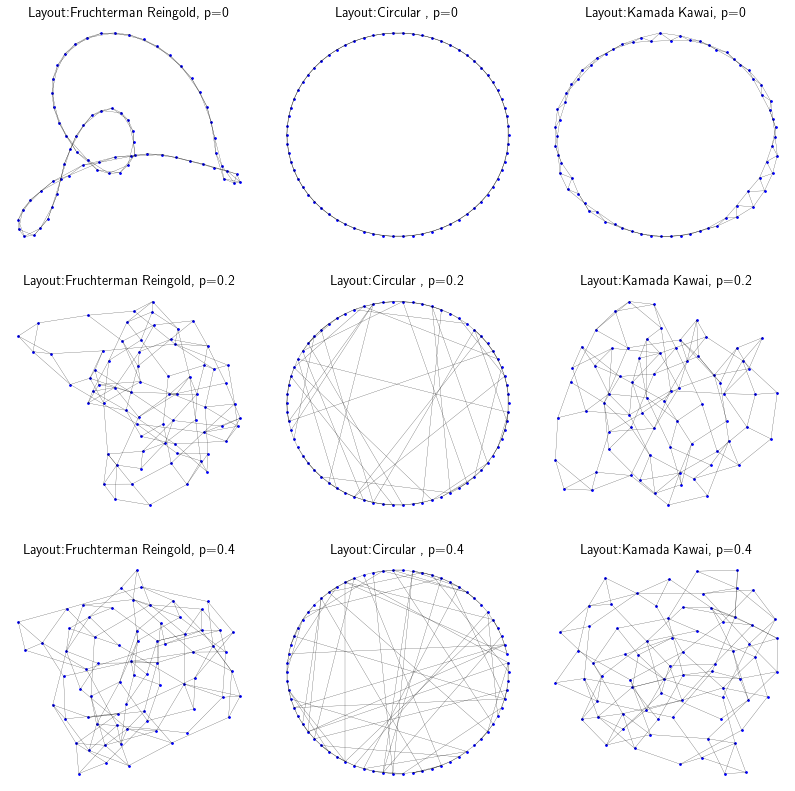

In [24]:
N = 70
K=4
p=[0,0.2,0.4]
fig = plt.figure()
gs = gridspec.GridSpec(3, 3, width_ratios=[1,1,1], wspace=0.1)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])
ax4 = plt.subplot(gs[3])
ax5 = plt.subplot(gs[4])
ax6 = plt.subplot(gs[5])
ax7 = plt.subplot(gs[6])
ax8 = plt.subplot(gs[7])
ax9 = plt.subplot(gs[8])
ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
ax4.axis('off')
ax5.axis('off')
ax6.axis('off')
ax7.axis('off')
ax8.axis('off')
ax9.axis('off')

G=nx.watts_strogatz_graph(N,K,p[0])
pos2d=nx.fruchterman_reingold_layout(G,dim=2)
node_x=[pos2d[k][0] for k in range(N)]
node_y=[pos2d[k][1] for k in range(N)]
edge_x = []
edge_y = []
for edge in G.edges():
    edge_x.append([pos2d[edge[0]][0],pos2d[edge[1]][0]])
    edge_y.append([pos2d[edge[0]][1],pos2d[edge[1]][1]])    
ax1.scatter(node_x, node_y, s=3, marker='o', c="blue")
for i in range(len(G.edges())):
    ax1.plot(edge_x[i], edge_y[i], linewidth=0.2, c="black")
titelstr='Layout:Fruchterman Reingold, p='+str(p[0])
ax1.set_title(titelstr)

pos2d=nx.circular_layout(G,dim=2)
node_x=[pos2d[k][0] for k in range(N)]
node_y=[pos2d[k][1] for k in range(N)]
edge_x = []
edge_y = []
for edge in G.edges():
    edge_x.append([pos2d[edge[0]][0],pos2d[edge[1]][0]])
    edge_y.append([pos2d[edge[0]][1],pos2d[edge[1]][1]])    
ax2.scatter(node_x, node_y, s=3, marker='o', c="blue")
for i in range(len(G.edges())):
    ax2.plot(edge_x[i], edge_y[i], linewidth=0.2, c="black")
titelstr='Layout:Circular , p='+str(p[0])
ax2.set_title(titelstr)

pos2d=nx.kamada_kawai_layout(G,dim=2)
node_x=[pos2d[k][0] for k in range(N)]
node_y=[pos2d[k][1] for k in range(N)]
edge_x = []
edge_y = []
for edge in G.edges():
    edge_x.append([pos2d[edge[0]][0],pos2d[edge[1]][0]])
    edge_y.append([pos2d[edge[0]][1],pos2d[edge[1]][1]])    
ax3.scatter(node_x, node_y, s=3, marker='o', c="blue")
for i in range(len(G.edges())):
    ax3.plot(edge_x[i], edge_y[i], linewidth=0.2, c="black")
titelstr='Layout:Kamada Kawai, p='+str(p[0])
ax3.set_title(titelstr)

G=nx.watts_strogatz_graph(N,K,p[1])
pos2d=nx.fruchterman_reingold_layout(G,dim=2)
node_x=[pos2d[k][0] for k in range(N)]
node_y=[pos2d[k][1] for k in range(N)]
edge_x = []
edge_y = []
for edge in G.edges():
    edge_x.append([pos2d[edge[0]][0],pos2d[edge[1]][0]])
    edge_y.append([pos2d[edge[0]][1],pos2d[edge[1]][1]])    
ax4.scatter(node_x, node_y, s=3, marker='o', c="blue")
for i in range(len(G.edges())):
    ax4.plot(edge_x[i], edge_y[i], linewidth=0.2, c="black")
titelstr='Layout:Fruchterman Reingold, p='+str(p[1])
ax4.set_title(titelstr)

pos2d=nx.circular_layout(G,dim=2)
node_x=[pos2d[k][0] for k in range(N)]
node_y=[pos2d[k][1] for k in range(N)]
edge_x = []
edge_y = []
for edge in G.edges():
    edge_x.append([pos2d[edge[0]][0],pos2d[edge[1]][0]])
    edge_y.append([pos2d[edge[0]][1],pos2d[edge[1]][1]])    
ax5.scatter(node_x, node_y, s=3, marker='o', c="blue")
for i in range(len(G.edges())):
    ax5.plot(edge_x[i], edge_y[i], linewidth=0.2, c="black")
titelstr='Layout:Circular , p='+str(p[1])
ax5.set_title(titelstr)

pos2d=nx.kamada_kawai_layout(G,dim=2)
node_x=[pos2d[k][0] for k in range(N)]
node_y=[pos2d[k][1] for k in range(N)]
edge_x = []
edge_y = []
for edge in G.edges():
    edge_x.append([pos2d[edge[0]][0],pos2d[edge[1]][0]])
    edge_y.append([pos2d[edge[0]][1],pos2d[edge[1]][1]])    
ax6.scatter(node_x, node_y, s=3, marker='o', c="blue")
for i in range(len(G.edges())):
    ax6.plot(edge_x[i], edge_y[i], linewidth=0.2, c="black")
titelstr='Layout:Kamada Kawai, p='+str(p[1])
ax6.set_title(titelstr)

G=nx.watts_strogatz_graph(N,K,p[2])
pos2d=nx.fruchterman_reingold_layout(G,dim=2)
node_x=[pos2d[k][0] for k in range(N)]
node_y=[pos2d[k][1] for k in range(N)]
edge_x = []
edge_y = []
for edge in G.edges():
    edge_x.append([pos2d[edge[0]][0],pos2d[edge[1]][0]])
    edge_y.append([pos2d[edge[0]][1],pos2d[edge[1]][1]])    
ax7.scatter(node_x, node_y, s=3, marker='o', c="blue")
for i in range(len(G.edges())):
    ax7.plot(edge_x[i], edge_y[i], linewidth=0.2, c="black")
titelstr='Layout:Fruchterman Reingold, p='+str(p[2])
ax7.set_title(titelstr)

pos2d=nx.circular_layout(G,dim=2)
node_x=[pos2d[k][0] for k in range(N)]
node_y=[pos2d[k][1] for k in range(N)]
edge_x = []
edge_y = []
for edge in G.edges():
    edge_x.append([pos2d[edge[0]][0],pos2d[edge[1]][0]])
    edge_y.append([pos2d[edge[0]][1],pos2d[edge[1]][1]])    
ax8.scatter(node_x, node_y, s=3, marker='o', c="blue")
for i in range(len(G.edges())):
    ax8.plot(edge_x[i], edge_y[i], linewidth=0.2, c="black")
titelstr='Layout:Circular , p='+str(p[2])
ax8.set_title(titelstr)

pos2d=nx.kamada_kawai_layout(G,dim=2)
node_x=[pos2d[k][0] for k in range(N)]
node_y=[pos2d[k][1] for k in range(N)]
edge_x = []
edge_y = []
for edge in G.edges():
    edge_x.append([pos2d[edge[0]][0],pos2d[edge[1]][0]])
    edge_y.append([pos2d[edge[0]][1],pos2d[edge[1]][1]])    
ax9.scatter(node_x, node_y, s=3, marker='o', c="blue")
for i in range(len(G.edges())):
    ax9.plot(edge_x[i], edge_y[i], linewidth=0.2, c="black")
titelstr='Layout:Kamada Kawai, p='+str(p[2])
ax9.set_title(titelstr);